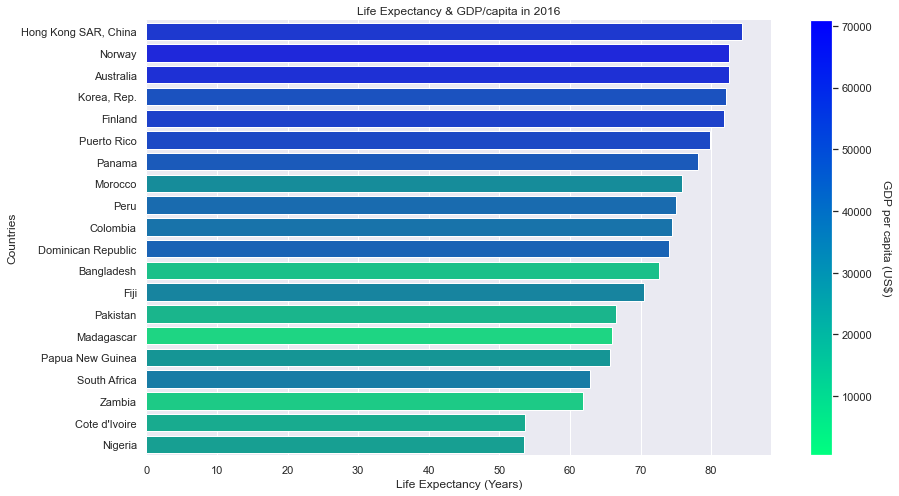

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

df = pd.read_csv("life_exp.csv")
df2 = pd.read_csv("gdp_capita.csv")

df = df.drop(df.index[0:92]).dropna()
df2 = df2.drop(df2.index[0:32])

random_countries = df2.sample(20)

random_countries = random_countries['Country Code']

countries = random_countries.tolist()

df = df[df['Country Code'].isin(countries)].drop('Unnamed: 0', axis=1).sort_values(by=['2016'], ascending=False)
overall_life_exp = df.groupby('Country Code').mean()
overall_life_exp = overall_life_exp['2016'].sort_values(ascending=False)
reorder_ind = overall_life_exp.index

df2 = df2[df2['Country Code'].isin(countries)].drop('Unnamed: 0', axis=1).set_index('Country Code').reindex(reorder_ind)
gdp = df2['2016']

ind = np.arange(len(overall_life_exp))

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(14,8))

my_cmap = ListedColormap(sns.color_palette("winter_r", 256)) 

norm = plt.Normalize(gdp.min(), gdp.max())
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm._A = []

ax = sns.barplot(x=overall_life_exp, y=df2['\ufeff"Country Name"'], hue=gdp, palette="winter_r", orient="h", dodge=False)
ax.get_legend().remove()
plt.ylabel('Countries')
plt.xlabel('Life Expectancy (Years)')
plt.title('Life Expectancy & GDP/capita in 2016')
ax.figure.colorbar(sm).set_label('GDP per capita (US$)', rotation=270, labelpad=20)
sns.despine(left=True, bottom=True)

#fig.savefig("life_exp_gdp.png")

#df2.nsmallest(10, '2016')